<a href="https://colab.research.google.com/github/ShaimaM/Intro_to_ML/blob/main/W2_D3_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group Members** 

*   Shaima Alamri 
*   Nada Alzahrani 



# Confusion Matrix

#### Dataset Options
1. Binary Classification Dataset of Your Choice
2. Seattle Rain Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv`
    - Note: target is `RAIN`
3. Titanic Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv`
3. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target is `Churn`
4. Iris dataset
    - `https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv`
    - Note: 3 possible classes

1. Load in your dataset.

In [ ]:
import pandas as pd 

df=pd.read_csv('https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Find out some information about the data...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Catgorical column describtion 
import numpy as np

df.describe(exclude=[np.number])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Masselmani, Mrs. Fatima",male,1601,G6,S
freq,1,577,7,4,644


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.Age=df.Age.fillna(df.Age.mean())

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.Embarked=df.Embarked.fillna(method ='ffill', inplace = False)


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualizations (of your choice)

In [ ]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


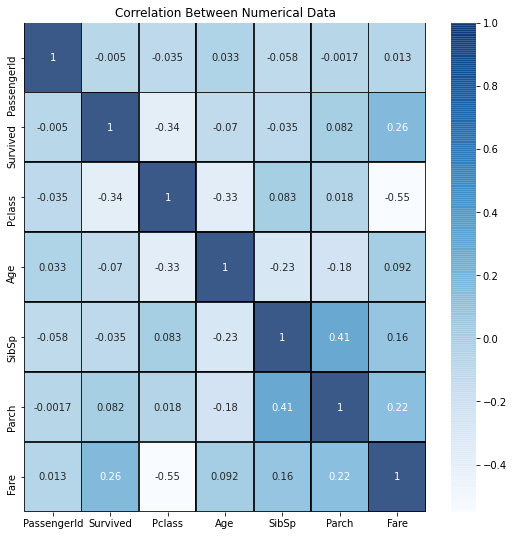

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 


plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='Blues', alpha= 0.8,linewidths=0.8, linecolor='black').set(title = 'Correlation Between Numerical Data');

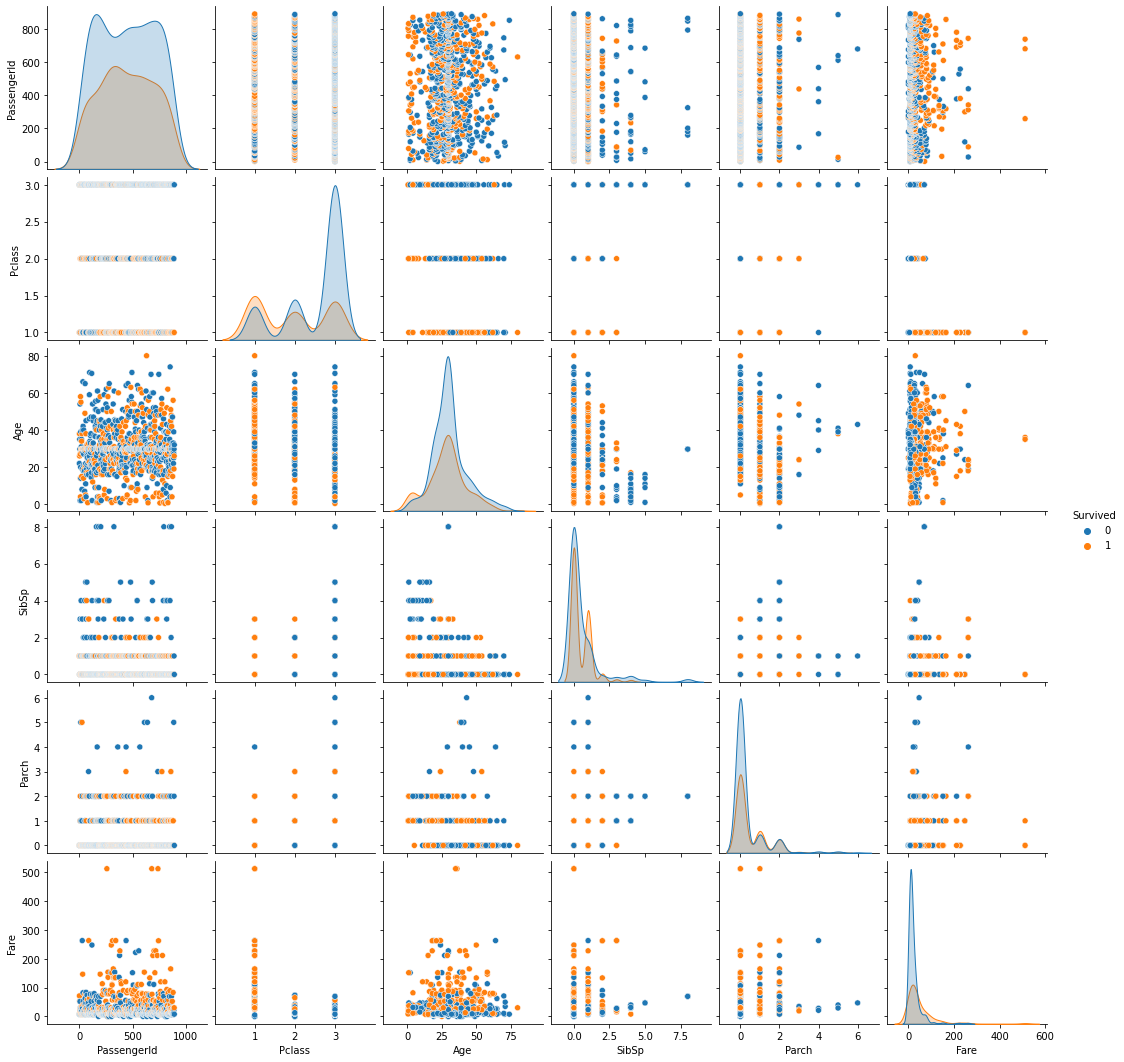

In [ ]:
sns.pairplot(df,hue='Survived');

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


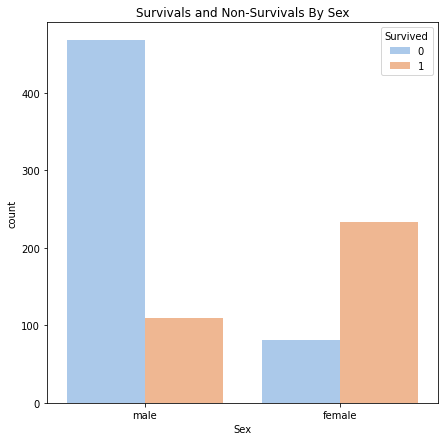

In [ ]:
plt.figure(figsize=(7, 7))
sns.countplot('Sex', hue='Survived', data=df , palette='pastel').set(title='Survivals and Non-Survivals By Sex');

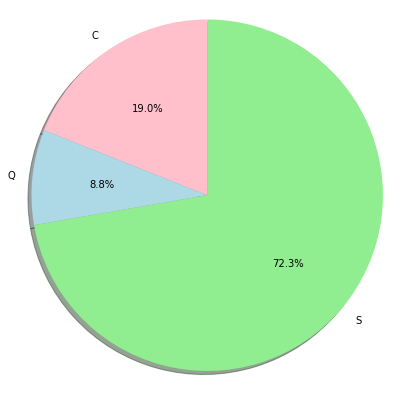

In [ ]:
g1 = df.groupby(['Embarked']).Embarked.count()
colors = ['pink', 'lightblue','lightgreen']

#colors = ['gold', 'lightskyblue','cornflowerblue']
fig1, ax1 = plt.subplots(figsize=(7,7) )
ax1.pie(g1 , autopct='%1.1f%%', shadow=True, startangle=90 , labels = ['C' , "Q" , 'S'] , colors=colors)
ax1.axis('equal') 
plt.show()

4. Perform any data prep that needs to be done before splitting...

Note: may not be necessary, may require more cells

In [ ]:
# convert string values to 0 and 1 - binary
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['Sex'] = label_encoding.fit_transform(df['Sex'].astype(str))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

In [ ]:
df=pd.get_dummies(df, columns=['Embarked'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


In [ ]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.005476,-0.027482,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.171485,0.008660,-0.155660
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.247223,0.213504,0.081720
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.086546,-0.079067,0.125722
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.033780,-0.003904,-0.027121
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.060751,-0.028085,0.070941
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.012400,-0.082636,0.063036
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.271478,-0.112712,-0.166603
Embarked_C,-0.005476,0.171485,-0.247223,-0.086546,0.033780,-0.060751,-0.012400,0.271478,1.000000,-0.149857,-0.781213
Embarked_Q,-0.027482,0.008660,0.213504,-0.079067,-0.003904,-0.028085,-0.082636,-0.112712,-0.149857,1.000000,-0.500146


5. Split your data into training and testing datasets...

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Fare']]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.tail()

,Fare
525,7.7500
535,26.2500
451,19.9667
4,8.0500
670,39.0000


6. Import, create, and fit a LogisticRegression model with 1 variable

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [ ]:
preds = lr.predict(X_test)

In [ ]:
# what do they look like? (show me some of the predictions)
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0])

7. Score your model...
- accuracy_score

In [ ]:
from sklearn.metrics import *

accuracy_score(y_test, preds) 

0.6305970149253731

8. Confustion Matrix

In [ ]:
df_crosstab = pd.crosstab(preds,y_test)
df_crosstab

Survived,0,1
row_0,,
0,151,89
1,10,18


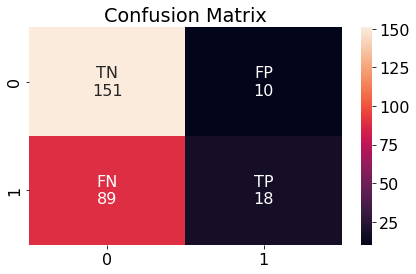

In [ ]:
preds = lr.predict(X_test)
cf = confusion_matrix(y_test, preds)

names =  ['TN', 'FP', 'FN','TP']
# make values seen in graph
num = cf.flatten()
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, num)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen

9. Explain your confusion matrix...
- How many of each value (TP, FP, TN, FN) do you have?
- What does each mean?

TP = 18 

FP = 10

TN = 151

FN = 89 


*   The Model predicted **151** didn't Survived and they actually didn't Survived .

*   The Model predicted **89** didn't Survived but actually they Survived.

*   The Model predicted **18** Survived and they actually Survived.
*   The Model predicted **10** Survived but they actually didn't Survived.







10. Create, and fit a LogisticRegression model with **more than** 1 variable

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Fare','Pclass','Sex', 'Age', 'SibSp',
       'Parch','Embarked_C', 'Embarked_Q',
       'Embarked_S']]
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

11. Make predictions on your `X_test` values...

In [ ]:
preds=lr.predict(X_test)

In [ ]:
# what do they look like? (show me some of the predictions)
preds

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1])

12. Score your model...
- accuracy_score


In [ ]:
accuracy_score(y_test, preds) 

0.7947761194029851

13.  Confustion Matrix

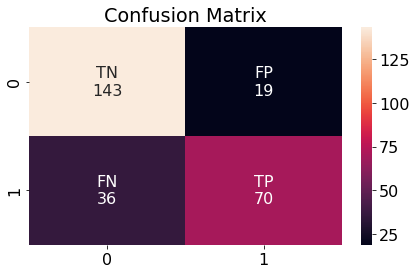

In [ ]:

preds = lr.predict(X_test)
cf = confusion_matrix(y_test, preds)

names =  ['TN', 'FP', 'FN','TP']
# make values seen in graph
num = cf.flatten()
# make strings from bundle of names & perc
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, num)]
labels = np.asarray(labels).reshape(2, 2)

# make plot
plt.figure(figsize=(7, 4))  # set up white canvis
plt.rcParams.update({'font.size': 16})  # font size
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");  # make it happen


14.  Explain your confusion matrix...
- How many of each value do you have?
- What does each mean?

TP = 70

FP = 19

TN = 143

FN = 36



*   The Model predicted **143** didn't Survived and they actually didn't Survived .

*   The Model predicted **70** didn't Survived but actually they Survived.

*   The Model predicted **36** Survived and they actually Survived.
*   The Model predicted **19** Survived but they actually didn't Survived.

15. Which model is better? Why?

**The second model is bettrr we obtained a high rate of accurecy and had higher TP and TN values .**

## Bonus

16. Perform GridSearchCV with the better data

In [ ]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'solver':[ "newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(lr, p_grid, cv=7)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

{'fit_intercept': True, 'solver': 'liblinear'}

17. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [ ]:
lr = LogisticRegression(fit_intercept=True,solver = 'liblinear' )

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

14. Accuracy Score and Confusion Matrix

In [ ]:
preds=lr.predict(X_test)

In [ ]:
accuracy_score(y_test,preds)

0.7873134328358209

Did the score change at all? Why?

**Yes , THe rate of accuracy score is decrease**


### Bonus Bonus
Figure out ROC plot. Tell me about it.

roc_auc_score for Logistic Regression:  0.8538027020731423


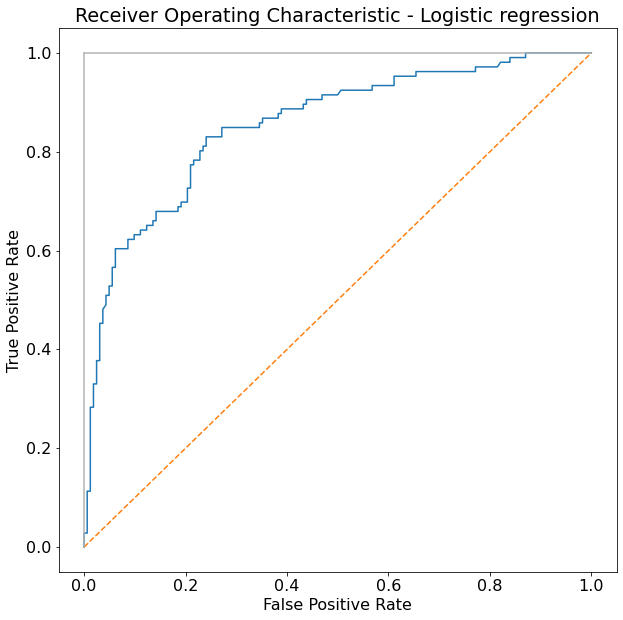

In [ ]:
# Getting predicted probabilities
y_score2 = lr.predict_proba(X_test)[:,1]

# Creating true and false positive rates
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score2))

# Ploting ROC curves
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7");

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');



**Refrence**: https://www.dezyre.com/recipes/plot-roc-curve-in-python

True Positive Rate = True Positives / (True Positives + False Negatives)

False Positive Rate = False Positives / (False Positives + True Negatives)


In [ ]:
True_Positive_Rate =  cf[1][1]/(cf[1][1]+cf[0][1])
True_Positive_Rate

0.7865168539325843

In [ ]:
False_Positive_Rate =  cf[1][0]/(cf[1][0]+cf[0][0])
False_Positive_Rate

0.2011173184357542

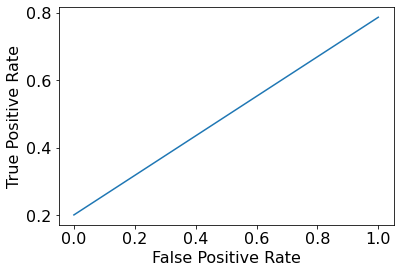

In [ ]:
plt.plot([False_Positive_Rate,True_Positive_Rate]);
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');